### Resultados provenientes del código IPF-FDMC

A continuación se realizan los siguientes cálculos a partir del archivo de salida del código IPF-FDMC:
1. Generar mapas de contorno del valor raíz cuadrática media del campo eléctrico oscilante de las ondas electromagnéticas en el plasma durante la absorción estacionaria.

In [4]:
#librerías
import numpy as np
import matplotlib.pyplot as plt #gráficos
from scipy import interpolate #interpolación 1
from scipy.interpolate import griddata #interpolación 2
import h5py #archivos en hdf5
from jupyterlab_h5web import H5Web #librería
from pathlib import Path, PurePath #manejo de rutas y archivos
%run -i ./Funciones.py #funciones importante

#Graficación
idioma = 'español'
#idioma = 'ingles'


if idioma == 'español':
    #plt.prop_cycle(color=['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97'])
    #axes.prop_cycle : cycler('color', ['0C5DA5', '00B945', 'FF9500', 'FF2C00', '845B97', '474747', '9e9e9e'])
    #Latex y coma como separador decimal
    plt.rcParams['text.usetex'] = True #latex
    #plt.rc('text', usetex=False)
    plt.rcParams['axes.formatter.use_locale'] = True #formato de eje para la coma
    #se incluye paquete matematico útil, se corrige el error con el espacio y el espacio entre los números
    plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{amsmath} \DeclareUnicodeCharacter{202F}{\,} \usepackage{ziffer} \usepackage{siunitx} \sisetup{output-decimal-marker = {,}, separate-uncertainty = true}') 
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
    })
    import locale #líbreria para el formato
    locale.setlocale(locale.LC_ALL, "es_CR.utf8")

if idioma == 'ingles' :
    plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{amsmath} \usepackage{siunitx}')
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
    })

In [ ]:
H5Web('./campo_E/fileout_v46_camara.h5') #visualización

In [2]:
#Ver zonas específicas de propagación O y X
def zona_E(archivo, a, a1, b, c, d) :
    #https://matplotlib.org/cmocean/ mapas de colores finos
    #https://stackoverflow.com/questions/26065811/same-color-bar-range-for-different-plots-matplotlib
    ruta_archivo = PurePath(Path(archivo)) #archivo 
    with h5py.File(ruta_archivo,'r') as E_rms_hdf5: #lectura archivo hdf
        E_rms = E_rms_hdf5[a][...][...]
        lamb = 3.0e8/2.45e9
        
        f = 0.45
        nfa_r = 0.75*f
        nfa_z = 0.75*f
        
        #nfa_r = 0
        #nfa_z = 0
        
        deltar1 = -0.004
        deltar2 = 0
        deltaz1 = 0
        deltaz2 = 0
        r_1 = -0.4161034431 + lamb*nfa_r + deltar1
        r_2 = 0.9179012429 - lamb*nfa_r + deltar2
        z_1 = -0.6421370829 + lamb*nfa_z + deltaz1
        z_2 = 0.6421370829 - lamb*nfa_z + deltaz2
        
        r = np.linspace(r_1, r_2, 2779) 
        z = np.linspace(z_1, z_2, 2681) 
        #coordenadas que cumplen la condición
        r_indices = np.where( (r >= a1) & (r <= b) ) 
        z_indices = np.where((z>= c) & (z <= d)  ) 
        
        #coordenadas nuevas
        r_nueva = r[r_indices]
        z_nueva = z[z_indices]
        rr , zz = np.meshgrid(r_indices[0], z_indices[0]) #construir malla de coordenadas
        E_rms_final = E_rms[rr, zz] #Asigna las coordenadas malla para obtener los valores
        
        
        return E_rms_final, r_nueva, z_nueva

def plotE_rms(E_rms_final,r_nueva, z_nueva, a1, b, c, d, v_min, v_max, cmap, n, figura):
               
        print(np.min(E_rms_final), np.max(E_rms_final))
        
        #corte frecuencia ciclotrónica electronica y frecuencia híbrida superior
        ne_norm = np.loadtxt('./regiones_importantes/ne_norm.txt')
        wce_norm = np.loadtxt('./regiones_importantes/wec_norm.txt')
        wuh_norm = np.loadtxt('./regiones_importantes/wuh.txt')
        wR_norm = np.loadtxt('./regiones_importantes/wR_norm.txt')
        wL_norm = np.loadtxt('./regiones_importantes/wL_norm.txt')
        grid_r, grid_z = np.mgrid[0.1971346:0.306079:297*2j, -0.03002686:0.03010837:165*2j] #cero grados - bsolctra solo 1000
        levels = np.arange(1.0, 1.01, 1) #O mode cut-off
        levels1 = np.arange(0.75,0.90, 0.1)
        levels_ce = np.arange(0.5,0.501, 0.5)
        
        plt.ylabel(r'$ z \left( \si{\metre} \right) $', 
                  fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
        plt.xlabel(r'$ R \left( \si{\metre} \right) $',  
                  fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'black'})
        plt.tick_params(axis='both', labelsize=18, width=1.5)
        ax = plt.gca()
        plt.setp(ax.spines.values(), linewidth=1.5)
        ax.tick_params(axis='both', labelsize=18, width=1.5)
        omode = plt.contour(grid_r, grid_z, ne_norm, levels, linestyles = 'solid', colors = '#e40303', linewidths = 1) # to plot the contour
        ce = ax.contour(grid_r,grid_z, wce_norm, levels_ce, linestyles = 'dashdot', colors = 'gray', linewidths =2)
        uh = plt.contour(grid_r,grid_z, wuh_norm, levels, linestyles = 'solid', colors = '#008026', linewidths = 1)
        R = plt.contour(grid_r,grid_z, wR_norm, levels, linestyles = 'dashed', colors = '#ff8c00', linewidths = 1)
        L = plt.contour(grid_r,grid_z,  wL_norm, levels, linestyles = 'dashed', colors = '#004dff', linewidths =1)
        
        
        # Crear una función interpoladora bilineal
        #from scipy.interpolate import interp2d
        #interpolador = interp2d(r_nueva, z_nueva, E_rms_final, bounds_error='False', fill_value=100)
        from scipy.interpolate import RegularGridInterpolator as RGI
        #r = RGI((r_nueva, z_nueva), E_rms_final.T, method='cubic', bounds_error=False, fill_value=None)
        
        # Trasladar los valores al siguiente índice en la misma fila
        #E_tras = np.roll(E_rms_final, shift=(8,-2), axis=(0,1))
            
       
        # Interpolar E_rms_final en los nuevos valores de r y z
        #nuevos_r = np.linspace(a1, b, 440)
        #nuevos_z = np.linspace(c, d, 440)
        #rrnew, zznew = np.meshgrid(nuevos_r, nuevos_z, indexing='ij', sparse=True)
        #E_rms_interpolado = interpolador(nuevos_r, nuevos_z)
        #E_rms_interpolado = r((rrnew, zznew))
        
        #plt.clabel(uh, inline=True, fontsize=10)
        #https://stackoverflow.com/questions/26065811/same-color-bar-range-for-different-plots-matplotlib   
        
        #Extraer las coordenadas x e y del contorno
        #contour_x = omode_coords[:, 0]
        #contour_y = omode_coords[:, 1]
       
        v_min = np.min(E_rms_final)
        v_max = np.max(E_rms_final)
        
        # Definir ubicaciones personalizadas en el eje x
        custom_yticks = np.linspace(-0.075, 0.075, 5)
        #custom_xticks = np.linspace(0.15+0.01, 0.45+0.01, 7)
        
        # Definir etiquetas personalizadas para esas ubicaciones
        custom_ytick_labels = [r'\num{-0.094}', r'\num{-0.047}', r'\num{0.00}', r'\num{0.047}', r'\num{0.094}']
        #custom_xtick_labels = [r'\num{0.11}', r'\num{0.16}', r'\num{-0.21}', r'\num{-0.26}', r'\num{-0.31}', r'\num{-0.36}', r'\num{-0.41}']
        
        
        # Establecer las ubicaciones y etiquetas personalizadas en el eje x
        plt.yticks(custom_yticks, custom_ytick_labels)
        #plt.xticks(custom_xticks, custom_xtick_labels)
        
        plt.gca().set_aspect('equal')
        plt.gcf().set_size_inches(9, 9)
        levels3 = np.linspace(v_min, v_max, n)
        
        
        h1 =  plt.contourf(r_nueva, z_nueva,  E_rms_final,  alpha=0.8, 
                           vmin = v_min, vmax = v_max, levels=levels3, cmap='magma') #correcto
        
        #Produce una barra del mismo tamaño del gráfico
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(h1, cax=cax)
        cbar.set_label(r'$ E_{rel} \left( 1 \right)$',  
                  fontdict = {'fontsize':18, 'fontweight':'bold', 'color':'black'}, rotation=270, labelpad=15)
        cbar.ax.tick_params(labelsize=18, width=1.5)
        cbar.outline.set_linewidth(1.5) #ancho del borde de la barra
        #ax.text(0.66, 0.71, r'\ding{172}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        #ax.text(0.70, 0.25, r'\ding{173}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        #ax.text(0.095, 0.455, r'\ding{174}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        #ax.text(0.35, 0.8, r'\ding{175}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        #ax.text(0.45, 0.16, r'\ding{176}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        
        #Leyenda en mapa de calor
        cont_0,_ = L.legend_elements()
        cont_1,_ = omode.legend_elements()
        cont_2,_ = uh.legend_elements()
        cont_3,_ = R.legend_elements()
        cont_4,_ = ce.legend_elements()   

        #plt.legend([cont_0[0], cont_1[0], cont_2[0], cont_3[0], cont_4[0]], 
        #[r'{$\omega = \omega_{L}$}', r'{ $\omega = \omega_{pe}$ }', r'{$\omega = \omega_{UH}$}', r'{$\omega = \omega_{R}$}', 
        #r'{$\omega = 2 \omega_{ce}$}'], fontsize = 18, loc='center', frameon=True,  bbox_to_anchor=(-10, -0.27),   ncol=3, fancybox=True, shadow=True)
        #plt.tight_layout()
        #plt.show()
        
        #plt.savefig(figura, dpi=300, bbox_inches='tight') 
        return

0
1


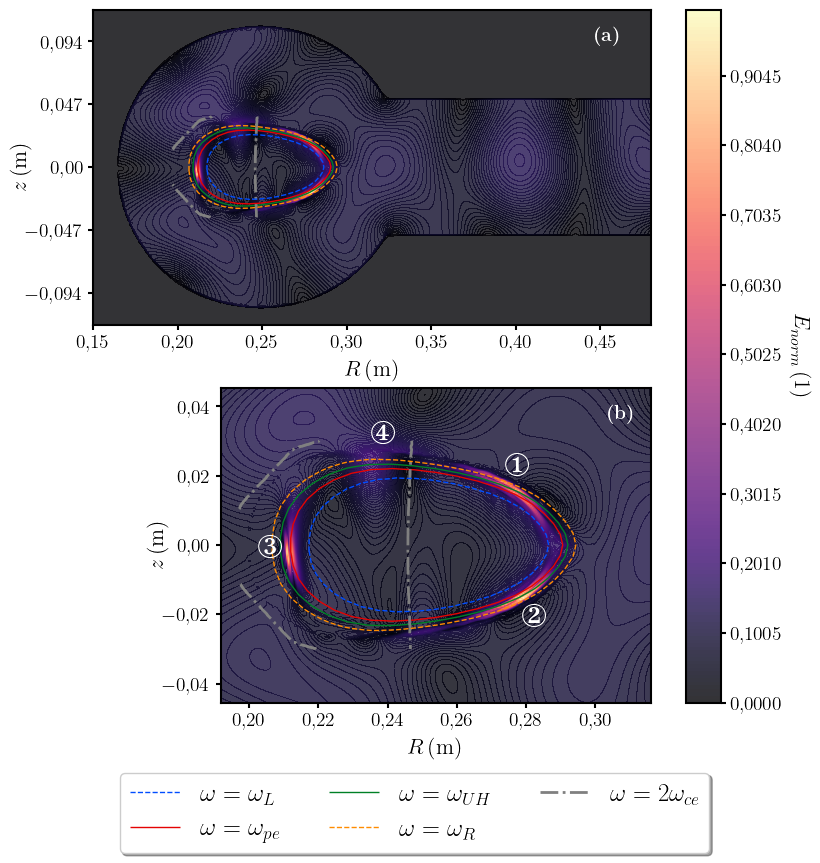

In [5]:
#Nuevo plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,18))
n = 0

for ax in axes.flat: #Logra asignar las características a la cantidad de subplots seleccionados
    E_rms_final1, r2, z2 = zona_E('./campo_E/fileout_v46_camara_1.h5',  'T0018__E_abs', 0.15, 0.48 ,-0.094 ,0.094) #hacia el plasma
    if n == 0 :
        a1 = 0.15
        b = 0.48
        c = -0.094
        d = 0.094
        #E_rms_final1, r2, z2 = zona_E('./campo_E/fileout_v46_camara.h5',  'T0020__E_abs', a1 ,b ,c ,d) #hacia el plasma
    elif n == 1 :
        a1 = 0.1957178997475323*0.98
        b = 0.3160799
        c = -0.03031574*1.5
        d = 0.03031574*1.5
    
    v_min = np.min(E_rms_final1)
    v_max = np.max(E_rms_final1)
    levels3 = np.linspace(0, 1, 200)
    
    h1 =  ax.contourf(r2, z2,  E_rms_final1/v_max,  alpha=0.8, extent=(a1, b,c,d),
                       vmin = 0, vmax = 1, levels=levels3, cmap='magma') #correcto
    print(n)
    
    #corte frecuencia ciclotrónica electronica y frecuencia híbrida superior
    ne_norm = np.loadtxt('./regiones_importantes/ne_norm.txt')
    wce_norm = np.loadtxt('./regiones_importantes/wec_norm.txt')
    wuh_norm = np.loadtxt('./regiones_importantes/wuh.txt')
    wR_norm = np.loadtxt('./regiones_importantes/wR_norm.txt')
    wL_norm = np.loadtxt('./regiones_importantes/wL_norm.txt')
    grid_r, grid_z = np.mgrid[0.1971346:0.306079:297*2j, -0.03002686:0.03010837:165*2j] #cero grados - bsolctra solo 1000
    levels = np.arange(1.0, 1.01, 1) #O mode cut-off
    levels1 = np.arange(0.75,0.90, 0.1)
    levels_ce = np.arange(0.5,0.501, 0.5)
    
    plt.gca().set_aspect('equal')
    plt.setp(ax.spines.values(), linewidth=1.5)
    ax.tick_params(axis='both', labelsize=14, width=1.5)
    plt.subplots_adjust(wspace=0.3) #ajustar el espacio entre subplots
    omode = ax.contour(grid_r, grid_z, ne_norm, levels, linestyles = 'solid', colors = '#e40303', linewidths = 1) # to plot the contour
    uh = ax.contour(grid_r,grid_z, wuh_norm, levels, linestyles = 'solid', colors = '#008026', linewidths = 1)
    ce = ax.contour(grid_r,grid_z, wce_norm, levels_ce, linestyles = 'dashdot', colors = 'gray', linewidths =2)
    R = ax.contour(grid_r,grid_z, wR_norm, levels, linestyles = 'dashed', colors = '#ff8c00', linewidths = 1)
    L = ax.contour(grid_r,grid_z,  wL_norm, levels, linestyles = 'dashed', colors = '#004dff', linewidths =1)
    ax.set_xlim(a1, b)
    ax.set_ylim(c, d)
    letras = np.array([r'$\textbf{\textrm{(a)}}$', r'$\textbf{\textrm{(b)}}$'])
    axes[n].text(0.9,0.9, letras[n], fontsize =14, 
                         fontdict=None, color='white', transform=axes[n].transAxes) #Etiquetar gráfica
           
    if n == 0:
        # Definir ubicaciones personalizadas en el eje x
        custom_yticks = np.linspace(-0.075, 0.075, 5)
        #custom_xticks = np.linspace(0.15+0.01, 0.45+0.01, 7)
        
        # Definir etiquetas personalizadas para esas ubicaciones
        custom_ytick_labels = [r'\num{-0.094}', r'\num{-0.047}', r'\num{0.00}', r'\num{0.047}', r'\num{0.094}']
        #custom_xtick_labels = [r'\num{0.11}', r'\num{0.16}', r'\num{-0.21}', r'\num{-0.26}', r'\num{-0.31}', r'\num{-0.36}', r'\num{-0.41}']
        
        # Establecer las ubicaciones y etiquetas personalizadas en el eje x
        ax.set_yticks(custom_yticks, custom_ytick_labels)
        #plt.xticks(custom_xticks, custom_xtick_labels)
    else:
        ax.text(0.66, 0.72, r'\ding{172}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        ax.text(0.70, 0.24, r'\ding{173}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        ax.text(0.087, 0.459, r'\ding{174}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        ax.text(0.35, 0.82, r'\ding{175}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        #ax.text(0.45, 0.10, r'\ding{176}', fontsize=24, fontdict=None, color='white', transform=ax.transAxes)
        #Leyenda en mapa de calor
        cont_0,_ = L.legend_elements()
        cont_1,_ = omode.legend_elements()
        cont_2,_ = uh.legend_elements()
        cont_3,_ = R.legend_elements()
        cont_4,_ = ce.legend_elements() 
        plt.legend([cont_0[0], cont_1[0], cont_2[0], cont_3[0], cont_4[0]], 
        [r'{$\omega = \omega_{L}$}', r'{ $\omega = \omega_{pe}$ }', r'{$\omega = \omega_{UH}$}', r'{$\omega = \omega_{R}$}', 
        r'{$\omega = 2 \omega_{ce}$}'], fontsize = 18, loc='center', frameon=True,  bbox_to_anchor=(0.45, -0.35),   ncol=3, fancybox=True, shadow=True)
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(9, 9)
    n =+ 1

axes[0].set_ylabel(r'$ z\left( \si{\metre} \right)$', 
                fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
axes[1].set_ylabel(r'$ z\left( \si{\metre} \right) $', 
                fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'black'}, labelpad = -5)
axes[0].set_xlabel(r'$ R \left( \si{\metre} \right)$', 
                fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'black'}, labelpad = 5)
axes[1].set_xlabel(r'$ R \left( \si{\metre} \right)$', 
                fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'black'}, labelpad = 5)
    
cbar = plt.colorbar(h1, ax=axes.ravel().tolist())
#cbar.set_ticks(np.arange(0,13.3,0.5)) #B=B0
cbar.set_label(r'$ E_{norm} \left( 1 \right)$',  
                  fontdict = {'fontsize':16, 'fontweight':'bold', 'color':'black'}, rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=14, width=1.5)
cbar.outline.set_linewidth(1.5) #ancho del borde de la barra
plt.savefig('Conversion_ox_camara.png', dpi=300, bbox_inches='tight') 
#plt.savefig('Conversion_ox_camara.eps', format='eps', dpi=300, bbox_inches='tight') #paper IOP

In [ ]:
#Propagación O - 1 - Falta ajustar rangos - generar de nuevo el output con la certeza de la densidad - ajustar las etiquetas de los ejes
datos, r, z = zona_E('./campo_E/fileout_v46_camara_1.h5',  'T0018__E_abs', 0.15, 0.48, 
               -0.094, 0.094) #hacia el plasma
plotE_rms(datos, r, z, 0.16030481117726603, 0.47971902090072005, -0.094, 0.094, 1.4962179e-06, 10.20748, "inferno", 100, 'conversion_ox_camara.png')

In [ ]:
#Reflexión O - 2 #faltaquitar la barra o colocarla donde no estorbe. Encontrar el verdadero estado estacionario.
datos, r, z = zona_E('./campo_E/fileout_v46_camara_1.h5',  'T0010__E_rms', 0.1957178997475323*0.98, 0.3160799, 
               -0.03031574*1.5, 0.03031574*1.5) #hacia el plasma
plotE_rms(datos, r, z,  0.19, 0.395, -0.1, 0.1, 0.0774463, 25.740557, "inferno", 180, 'Conversion_OX_zoom.png')

### Resultados provenientes del código IPF-FDMC

¿Hay posibilidad de que las ondas B se disipen por algún fenómeno del plasma?

In [ ]:
#Se busca la longitud de onda de la conversión X-B
from scipy.interpolate import make_interp_spline
datos1, r1, z1 = zona_E('./campo_E/fileout_v46_camara.h5',  'T0018__E_rms', 0.21729861, 0.222, -0.0150, -0.0100) #hacia el plasma

#r1 =  r1 - 0.247

#Método 1 
distancia = np.repeat(r1[:, np.newaxis], len(z1), axis=1)
distancia_flattened = distancia.flatten()
#print(distances_flattened)

#Método 2 
#R, Z = np.meshgrid(r1, z1)
#Distancia entre puntos de la malla
#distancia = np.linalg.norm(np.array([R.flatten(), Z.flatten()]), axis=0)


#Matriz de campo electrico
datos1_flattened = datos1.T.flatten()
#print(r1.shape, z1.shape, datos1_flattened.shape)
#print(distancia.shape, datos1_flattened.shape)


#plt.plot(distancia, datos1_flattened, 'o')
plt.plot(distancia_flattened, datos1_flattened, '-')
#plt.xlabel('distancia (m)')
#plt.ylabel('E_rms')
plt.xlim(0.217715, 0.218625)


lambda_B = 0.01211-0.00994
r_larmor = 0.000330

#¿cuánto tiempo le toma a las ondas bernstein propagarse?
f_0 = 2.45e9
v_p = f_0*lambda_B
t = 1/f_0 #periodo
print("la longitud de onda de las ondas Bernstein es", lambda_B/r_larmor, "veces el radio de Larmor")
print("La velocidad de fase de las ondas de Bernstein es", v_p, "m/s")
print("El periodo de las ondas de Bernstein es", t, "s")
print("El tiempo que tarda un electrón en colisionar con un ión es", 1/76500, "s")
print("El tiempo que tarda un electrón en colisionar con un neutro es", 1/1.354e7, "s")

print("La distancia recorrida antes de colisionar con un ión es", v_p*1/76500, 'm'  )
print("La distancia recorrida antes de colisionar con un neutro es", v_p*1/1.354e7, 'm'  )

#X_Y_Spline = make_interp_spline(distances, datos1_flattened)
#d = np.linspace(distances.min(), distances.max(), 100)
#E = X_Y_Spline(d)    
    
